# Investigating the TMDb Movie Data

#### Udacity alx Data Analyst Nanodegree
#### Salami Suleiman, August 2022


## Introduction

This project investigates the profitability of movies, the relationship between profit, popularity, and movie runtime. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The specific questions being investigated here are:
* Are movies still profitable?
* What are the top 10 profitable movies?
* How are profits and average votes related?


## Data wrangling

* In this section, we load the data, present, and observe the data to begin the analysis. 

In [1]:
# load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load dataset

path = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
df = pd.read_csv(path)

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


The data appears to have loaded correctly and we can proceed with the next steps.

* In this section, we will explore the dataset to  identify its size, features, missing values, duplicate rows and unique values before we commence our analysis.

In [4]:
df.shape

(10866, 21)

In [5]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.duplicated().sum()

1

* From the initial checks, there are 10866 observations, and 21 features.
* The data types appears to be in order.
* There are some missing values, but they are not in major features.
* The unused features will be dropped.
* The missing values in genres will also be droppped.
* The duplicate rows will also be dropped.

In [8]:
df.drop(columns = ['imdb_id', 'tagline', 'homepage', 'cast', 'production_companies', 'keywords', 'overview' ], inplace=True)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 14)

In [10]:
df.dropna(how='any', subset=['genres'], inplace=True)
df.shape

(10842, 14)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          42
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

## Are movies still profitable?

We will define profit as the difference between revenue and budget using the adjusted values.
Before we proceed, we will explore the distribution of the two features using a histgram.

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Text(0.5, 0, 'Data')

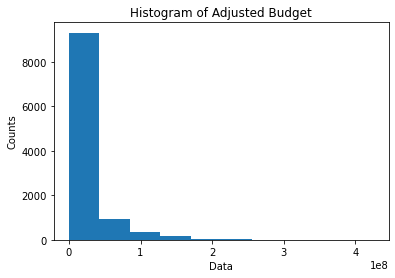

In [14]:
plt.hist(df["budget_adj"])
plt.title('Histogram of Adjusted Budget')
plt.ylabel('Counts')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

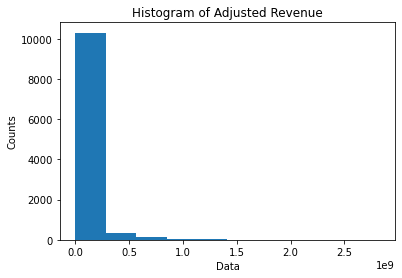

In [15]:
plt.hist(df["revenue_adj"])
plt.title('Histogram of Adjusted Revenue')
plt.ylabel('Counts')
plt.xlabel('Data')

* There appears to be a lot of values around the zero point which might indicate budget and revenue of zero.
* Since, revenue could be zero, we will drop all zero values under budget_adj.

In [16]:
df.query("budget_adj <= 0")["budget_adj"].count()

5674

In [17]:
df.query("revenue_adj <= 0")["revenue_adj"].count()

5993

In [18]:
df_clean = df.query("budget_adj > 0")

In [19]:
df_clean.shape

(5168, 14)

* The new dataset has a significatly low size than the original, however, for the purposes of our analysis, we continue with this new subset.
* We will first explore the relationship between the budget and revenue, then evaluate the profit as revenue_adj - budget_adj

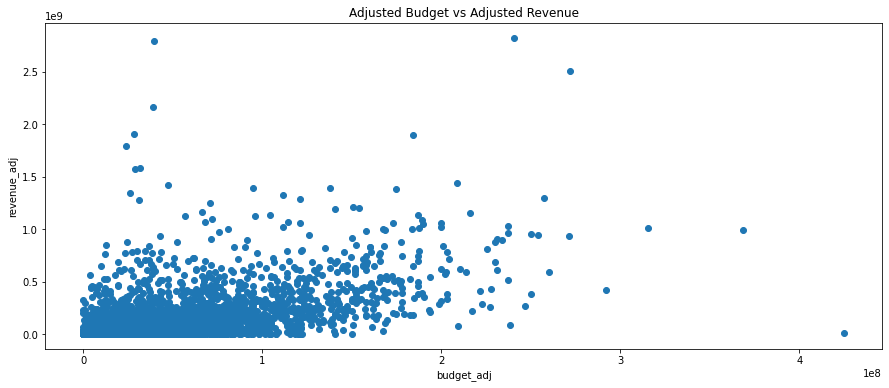

In [20]:
# sctter plot of adjusted revenue and budget

plt.figure(figsize = (15, 6))
plt.scatter(df_clean["budget_adj"], df_clean["revenue_adj"])
plt.title('Adjusted Budget vs Adjusted Revenue')
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj')
plt.show()

In [21]:
import warnings
warnings.filterwarnings('ignore') # disable warnings from computation

# compute profit from adjusted budjet and revenue

df_clean["profit"] = (df_clean["revenue_adj"] - df_clean["budget_adj"])/1000000

Text(0.5, 0, 'Data')

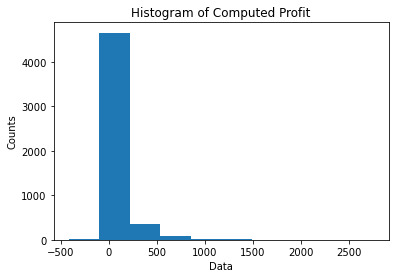

In [22]:
# histogram of profit

plt.hist(df_clean["profit"])
plt.title('Histogram of Computed Profit')
plt.ylabel('Counts')
plt.xlabel('Data')

* There is a positive correlation between adjusted budget and revenue from the scatter plot. 
* Profit is computed and scaled into millions.
* Profit can be seen to be right skewed with smal negative values that indicate losses.
* Thus, we observe that most movies make profit although there are sometimes losses or rather minimal profit

In [23]:
# what proportion of the movies make losses or break even

df_clean.query("profit <= 0")["profit"].count() / df_clean.shape[0]

0.46246130030959753

* About 46% of the movies do not make profit
* We will now explore further to know whether there is a trend in years of the profit.

In [24]:
# group year of release by average profit 

df_profit_year = df_clean.groupby("release_year")["profit"].mean()
df_profit_year.head()

release_year
1960     87.613834
1961    163.619914
1962     78.061179
1963     66.797239
1964    184.787631
Name: profit, dtype: float64

Text(0.5, 0, 'Release Year')

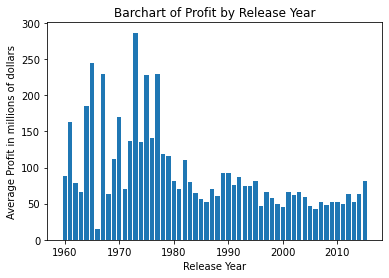

In [25]:
# bar chart of year and average profit

plt.bar(df_profit_year.index, df_profit_year)
plt.title('Barchart of Profit by Release Year')
plt.ylabel('Average Profit in millions of dollars')
plt.xlabel('Release Year')


* We notice that profits have been rather inconsistent over the year, reaching a peak in the early year of 1960 to 1980
* However, profit have remained stable since the 1990's with a few exceptions
* We can conclude that movies are still profitable. However the profitability has some what reduced over the year
* What has been the most profitable movies?

## What are the top 10 profitable movies?

In [26]:
# sort data by profit, and select top 10

top = df_clean[["release_year","original_title", "genres","profit"]].sort_values('profit', ascending=False)[0:10]
top

,release_year,original_title,genres,profit
1329,1977,Star Wars,Adventure|Action|Science Fiction,2750.136651
1386,2009,Avatar,Action|Adventure|Fantasy|Science Fiction,2586.236848
5231,1997,Titanic,Drama|Romance|Thriller,2234.713671
10594,1973,The Exorcist,Drama|Horror|Thriller,2128.035625
9806,1975,Jaws,Horror|Thriller|Adventure,1878.643094
8889,1982,E.T. the Extra-Terrestrial,Science Fiction|Adventure|Family|Fantasy,1767.968064
3,2015,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1718.723211
8094,1995,The Net,Crime|Drama|Mystery|Thriller|Action,1551.568265
10110,1961,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,1545.635295
7309,1980,The Empire Strikes Back,Adventure|Action|Science Fiction,1376.997526


Text(0.5, 0, 'Profit in millions of dollars')

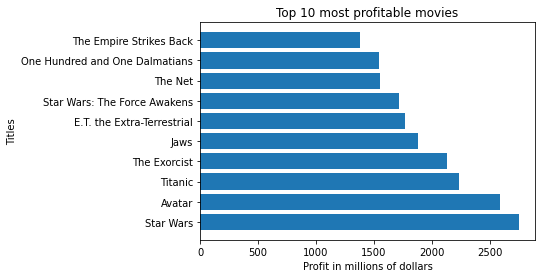

In [27]:
# bar chart of top 10 profitable movies

plt.barh(top["original_title"], top["profit"])
plt.title('Top 10 most profitable movies')
plt.ylabel('Titles')
plt.xlabel('Profit in millions of dollars')

* We observe that, 6 out of the 10 top profitable movies were release before the 1980's 
* This confirms our early conclusion of the early movies bieng more profitable than the later and newer movies

## What are the top 10 profitable movie genres?

In [28]:
# function to split the genre feature and return a new dataframe with genre listed in rows.

def col_to_list(df,col):
    new_df = df[col].str.split('|')
    new_df = new_df.apply(pd.Series)
    return new_df    
    

In [29]:
# applying col_to_list function

df_genre = col_to_list(df_clean, 'genres')
df_genre.head(2)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN


In [30]:
# merge df_genre and df_clean tables

df_genre = df_genre.merge(df_clean, left_index=True, right_index = True)
df_genre.head(2)

,0,1,2,3,4,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,Action,Adventure,Science Fiction,Thriller,NaN,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254.445953
1,Action,Adventure,Science Fiction,Thriller,NaN,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,210.161353


In [31]:
# unpivot genres from columns into rows

df_genre = df_genre.melt(id_vars=['id','popularity','budget','revenue','original_title','director','runtime','genres','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj','profit'],
                         value_name="movie_genre")
df_genre.head(2)



,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,variable,movie_genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254.445953,0,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,210.161353,0,Action


In [32]:
# drop  unused columns
df_genre.drop(['genres','variable'],axis=1,inplace=True)

In [33]:
# see new size of dataframe

df_genre.shape

(25840, 15)

In [34]:
# drop missing values
df_genre.isna().sum()
df_genre.dropna(how='any', subset=['movie_genre'], inplace=True)
df_genre.shape

(13601, 15)

In [35]:
# see final dataframe

df_genre.sort_values(by='original_title').head(5)

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,movie_genre
482,19913,3.244139,7500000,60722734,(500) Days of Summer,Marc Webb,95,7/17/09,1778,7.3,2009,7.623003e+06,6.171861e+07,54.09561,Comedy
5650,19913,3.244139,7500000,60722734,(500) Days of Summer,Marc Webb,95,7/17/09,1778,7.3,2009,7.623003e+06,6.171861e+07,54.09561,Drama
10818,19913,3.244139,7500000,60722734,(500) Days of Summer,Marc Webb,95,7/17/09,1778,7.3,2009,7.623003e+06,6.171861e+07,54.09561,Romance
6144,4951,1.769152,16000000,53478166,10 Things I Hate About You,Gil Junger,97,3/30/99,947,7.2,1999,2.094485e+07,7.000575e+07,49.06090,Romance
11312,4951,1.769152,16000000,53478166,10 Things I Hate About You,Gil Junger,97,3/30/99,947,7.2,1999,2.094485e+07,7.000575e+07,49.06090,Drama


In [36]:
# summary of movie genres counts

genre_values = df_genre['movie_genre'].value_counts(ascending=False)
genre_values

Drama              2316
Comedy             1740
Thriller           1641
Action             1428
Adventure           906
Romance             861
Crime               823
Horror              765
Science Fiction     701
Family              523
Fantasy             508
Mystery             440
Animation           260
History             183
Music               169
War                 155
Western              74
Documentary          64
Foreign              35
TV Movie              9
Name: movie_genre, dtype: int64

In [37]:
# create data frame of movie genre counts and proportion

df_g = {'counts' : genre_values}

genre_counts = pd.DataFrame(df_g, columns = ['counts'])
genre_counts['proportion'] = ((genre_counts['counts'] / genre_counts['counts'].sum()) * 100).round(2)
genre_counts

,counts,proportion
Drama,2316,17.03
Comedy,1740,12.79
Thriller,1641,12.07
Action,1428,10.50
Adventure,906,6.66
Romance,861,6.33
Crime,823,6.05
Horror,765,5.62
Science Fiction,701,5.15
Family,523,3.85


In [38]:
# group movie genre by average profit 

df_profit_genre = df_genre.groupby("movie_genre")["profit"].mean().sort_values(ascending=False)[0:10]
df_profit_genre.head()

movie_genre
Animation          156.926863
Adventure          153.037941
Family             134.737820
Fantasy            127.385585
Science Fiction     97.906035
Name: profit, dtype: float64

Text(0, 0.5, 'Movie Genre')

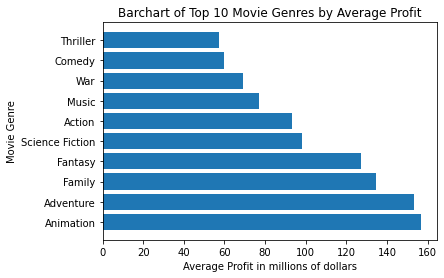

In [39]:
# bar chart of movie genres and average profit

plt.barh(df_profit_genre.index, df_profit_genre)
plt.title('Barchart of Top 10 Movie Genres by Average Profit')
plt.xlabel('Average Profit in millions of dollars')
plt.ylabel('Movie Genre')


* These rankings are not entirely accurate since is includes multiple double couting for several movies
* However, the top genres are closely related to the top 10 most profitable movies except for the Animation which doesn't feature in the movies list
* Moreover, it is interesting to find that the Drama genre, although it has the highest proportion in the movie count isn't in the top 10  by profit.
* Finally, Animation which is only 1.91% of all the movies makes the highest average profit among the movie genres


## How are profits and average votes related?

Text(0, 0.5, 'Vote Average')

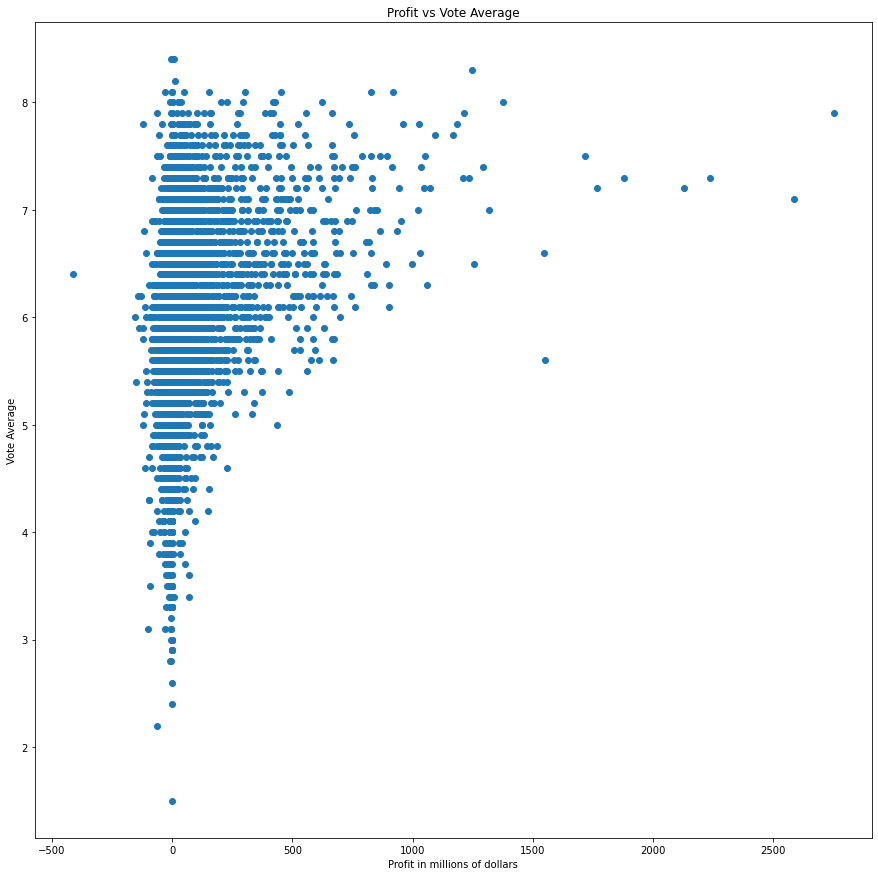

In [40]:
# scatter plot of profit vs vote average

plt.figure(figsize = (15, 15))

plt.scatter(df_clean['profit'], df_clean['vote_average'])
plt.title('Profit vs Vote Average')
plt.xlabel("Profit in millions of dollars")
plt.ylabel('Vote Average')

* From the results, we can see that the most profitable movies have relatively high vote average

## Conclusions and Limitations



This project analysed the profitability of 10,000 movies collected from The Movie Database (TMDb) by answering the following questions:

* Are movies still profitable?
* What are the top 10 profitable movies?
* How are profits and average votes related?

In conclusion, it can be said that, generally movies are still profitable.
* However, the level of profitable has rather reduced over time
* Modern movies are not as profitable as movies made between the 1960's and 1980's
* 60% of the top 10 most profitable movies were release before 1980
* The most profitable movie genre is Animation although it is only about 2% of all the movies in the data
* There appear to be a slight correlation between profit and movie votes.
* The most profitable movies have relatively higher vote average than other movies.

The following are some of the limitation of this report:
* A significant portion of the data was dropped becasue of missing values
* The results on the most profitable movie genres is not entirely accurate due to double counting
* Most of the variables were categorical which did not allow for a more vigorous statistical analysis
* The movies in the database are limited up to 2015, thus newer movies will cause significant changes in the results presented here.